## Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("terrorism_dataset.csv")

C:\Users\pranjali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                  'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type',
                  'weaptype1_txt':'Weapon_Type','motive':'Motive','latitude':'Latitude','city':'City','longitude':'Longitude'},inplace=True)

In [6]:
data = df[['Year','Month','Day','Extended','Country','State','Region','City','Latitude','Longitude','AttackType','Killed',
          'Wounded','Target','Summary','Group','Target_Type','Weapon_Type','Motive']]

In [7]:
data.head()

,Year,Month,Day,Extended,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.shape

(181691, 19)

In [9]:
data.describe()

,Year,Month,Day,Extended,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_Type         0
Weapon_Type         0
Motive         131130
dtype: int64

## Top 5 countries with most Terrorist attacks

In [11]:
print(data['Country'].value_counts().head())

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64


C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


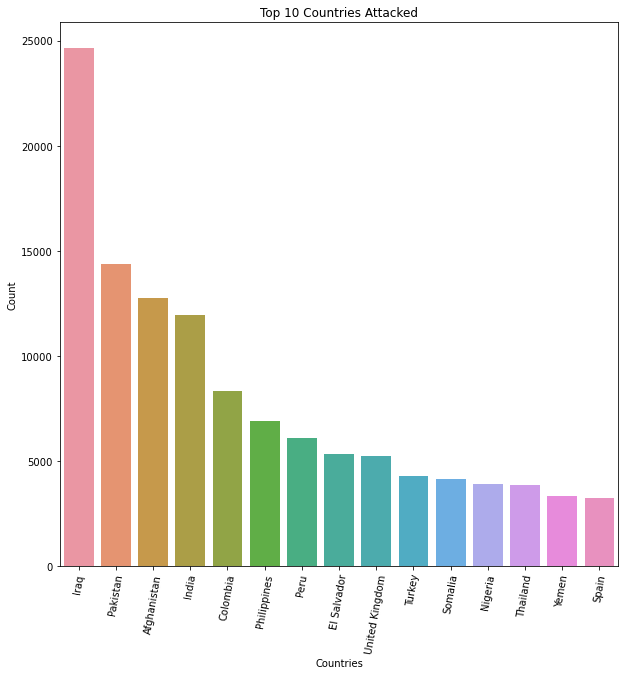

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values)
plt.title("Top 10 Countries Attacked")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Most Attacked Country is Iraq

## Indian States with most Terrorist Attacks 

In [13]:
india = data[data['Country']=='India']['State']
india.value_counts()[:10]

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: State, dtype: int64

C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


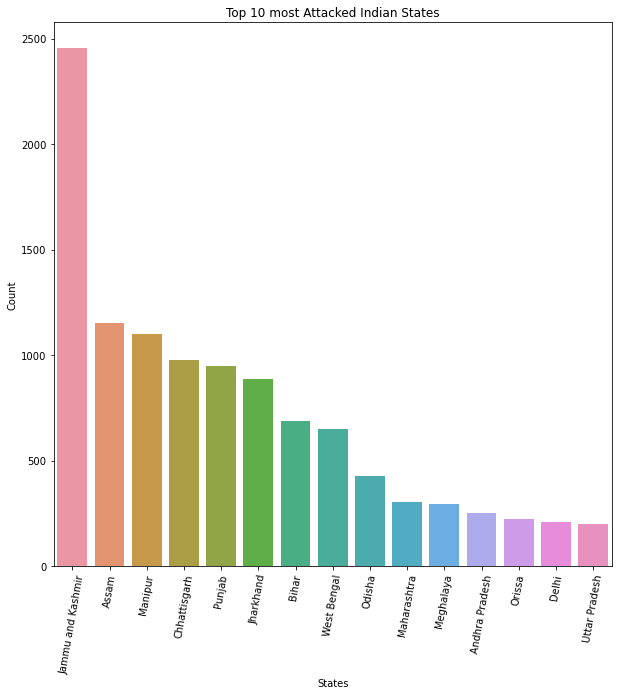

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(india.value_counts()[:15].index,india.value_counts()[:15].values)
plt.title("Top 10 most Attacked Indian States")
plt.xlabel("States")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Most Attacked State in India is Jammu and Kashmir.

## Most Attacked States

In [15]:
print(data['State'].value_counts().head(10))

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


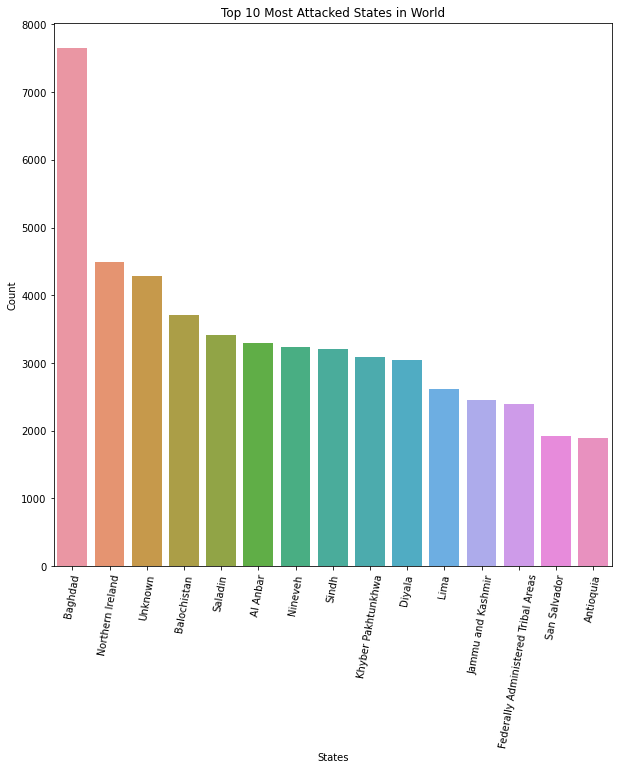

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(data['State'].value_counts()[:15].index,data['State'].value_counts()[:15].values)
plt.title("Top 10 Most Attacked States in World")
plt.xlabel("States")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Most Attacked State in the World is Baghdad

## Most Attacked Cities 

In [17]:
print(data['City'].value_counts().head(10))

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64


C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


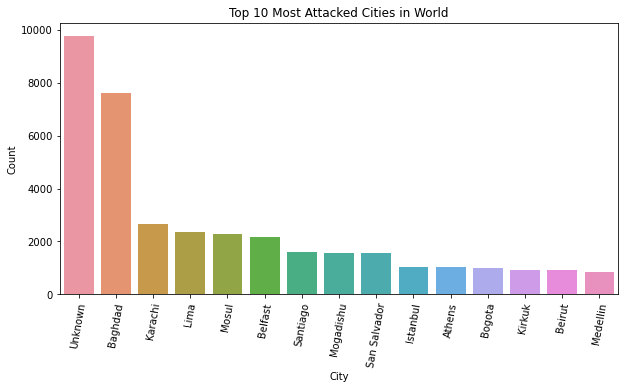

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data['City'].value_counts()[:15].index,data['City'].value_counts()[:15].values)
plt.title("Top 10 Most Attacked Cities in World")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Most attacked city is unkown and second is Baghdad 

## Most Attacked Regions

In [19]:
print(data['Region'].value_counts().head(10))

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


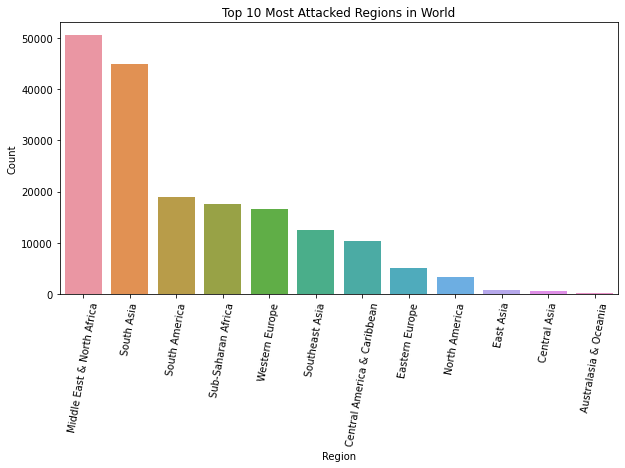

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data['Region'].value_counts()[:15].index,data['Region'].value_counts()[:15].values)
plt.title("Top 10 Most Attacked Regions in World")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Most Attacked Region in the World Middle East & North Africa 

## Year with Most Terrorist Attack

In [21]:
print(data['Year'].value_counts().head(10))

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


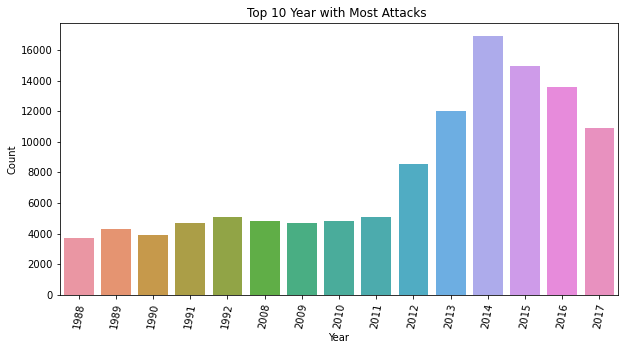

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data['Year'].value_counts()[:15].index,data['Year'].value_counts()[:15].values)
plt.title("Top 10 Year with Most Attacks ")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Year With most Terrorist Attacks is 2014

## Most Involved Terrorist Group

In [23]:
print(data['Group'].value_counts().head(10))

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


C:\Users\pranjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


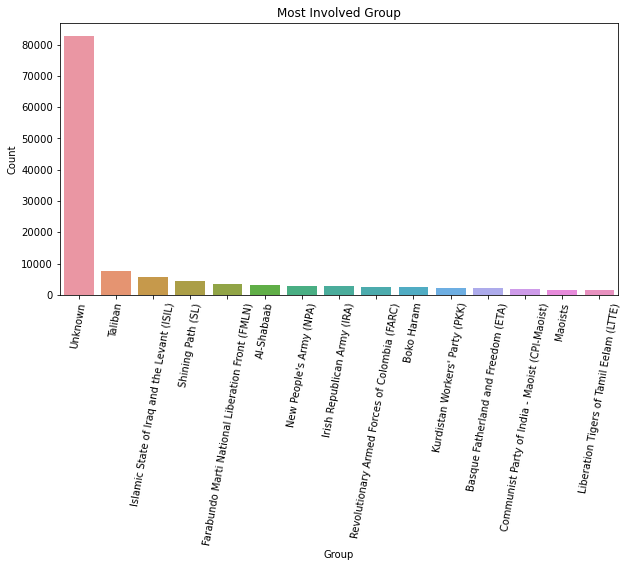

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data['Group'].value_counts()[:15].index,data['Group'].value_counts()[:15].values)
plt.title("Most Involved Group")
plt.xlabel("Group")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

### Conclusion :- Most invovled Group in Terrorist Attacks is unknown and second is Taliban